<a href="https://colab.research.google.com/github/mayankjain281/ML_Loan_Approval_Prediction/blob/main/ML_Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the problem statement

 - Dream Housing Finance company deals in all kinds of home loans. They have a presence across all urban, semi-urban and rural areas. The customer first applies for a home loan and after that, the company validates the customer eligibility for the loan.

- The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

- To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

## Data

- Variable Descriptions:


| Variable          	| Description                                    	|
|-------------------	|------------------------------------------------	|
| Loan_ID           	| Unique Loan ID                                 	|
| Gender            	| Male/ Female                                   	|
| Married           	| Applicant married (Y/N)                        	|
| Dependents        	| Number of dependents                           	|
| Education         	| Applicant Education (Graduate/ Under Graduate) 	|
| Self_Employed     	| Self employed (Y/N)                            	|
| ApplicantIncome   	| Applicant income                               	|
| CoapplicantIncome 	| Coapplicant income                             	|
| LoanAmount        	| Loan amount in thousands                       	|
| Loan_Amount_Term  	| Term of loan in months                         	|
| Credit_History    	| credit history meets guidelines                	|
| Property_Area     	| Urban/ Semi Urban/ Rural                       	|
| Loan_Status       	| Loan approved (Y/N)                            	|


- This is a classification problem in which we need to classify whether the loan will be approved or not. classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. A few examples of classification problems are Spam Email detection, Cancer detection, Sentiment Analysis, etc.

In [ ]:
# Importing Library
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# Reading the training dataset in a dataframe using Pandas
data = pd.read_csv("train.csv")

# Reading the test dataset in a dataframe using Pandas
test = pd.read_csv("test.csv")


In [ ]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
75,LP001255,Male,No,0,Graduate,No,3750,0.0,113.0,480.0,1.0,Urban,N
577,LP002874,Male,No,0,Graduate,No,3229,2739.0,110.0,360.0,1.0,Urban,Y
557,LP002795,Male,Yes,3+,Graduate,Yes,10139,0.0,260.0,360.0,1.0,Semiurban,Y
589,LP002926,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,360.0,0.0,Semiurban,N
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
92,LP001319,Male,Yes,2,Not Graduate,No,3273,1820.0,81.0,360.0,1.0,Urban,Y
166,LP001577,Female,Yes,0,Graduate,No,4583,0.0,112.0,360.0,1.0,Rural,N
329,LP002087,Female,No,0,Graduate,No,2500,0.0,67.0,360.0,1.0,Urban,Y
340,LP002115,Male,Yes,3+,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,N
129,LP001465,Male,Yes,0,Graduate,No,6080,2569.0,182.0,360.0,NaN,Rural,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We will prepare data for model training i.e. removing ouliers , filling null values , removing skewness

In [ ]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

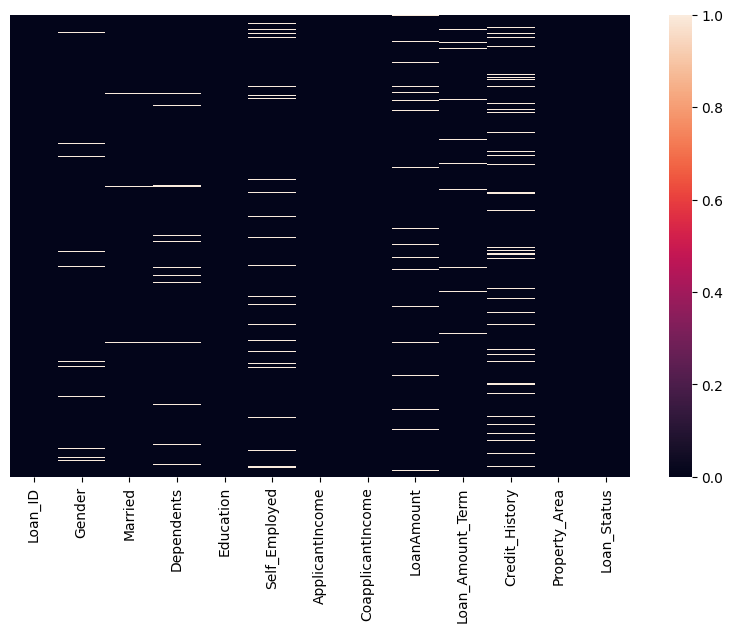

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [ ]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
1.0    475
0.0     89
Name: Credit_History, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<Axes: >

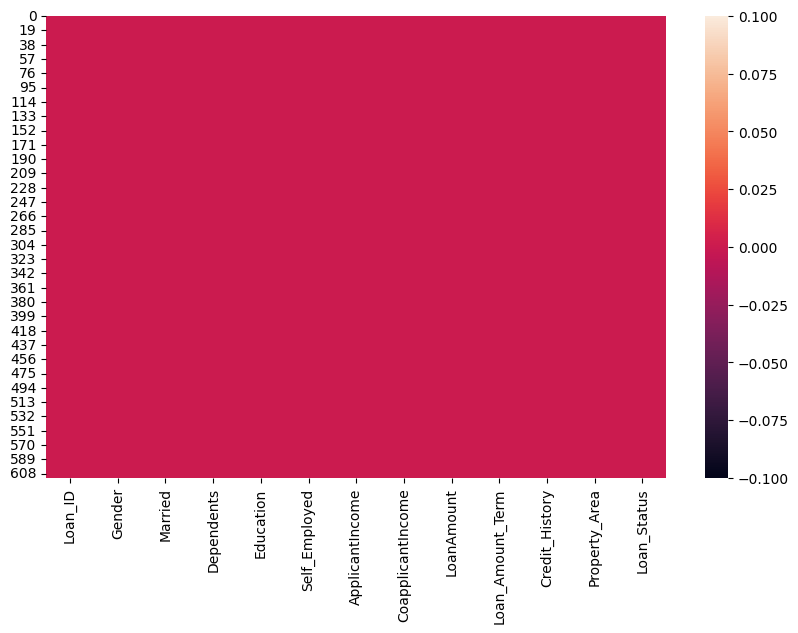

In [ ]:
#Filling all Nan values with mode of respective variable
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mode()[0],inplace=True)
data["Dependents"].fillna(data["Dependents"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

#All values of "Dependents" columns were of "str" form now converting to "int" form.
data["Dependents"] = data["Dependents"].replace('3+',int(3))
data["Dependents"] = data["Dependents"].replace('1',int(1))
data["Dependents"] = data["Dependents"].replace('2',int(2))
data["Dependents"] = data["Dependents"].replace('0',int(0))

data["LoanAmount"].fillna(data["LoanAmount"].median(),inplace=True)

print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull())

In [ ]:
### Checking if the non-categorical variables are Normally Distributed or Not. i.e. Checking outliers...

print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

Data distribution analysis:->---------------------------------------


Mean:->

ApplicantIncome:  5403.459283387622
CoapplicantIncome:  1621.2457980271008
LoanAmount:  145.75244299674267

Mode:->

ApplicantIncome:  [2500]
CoapplicantIncome:  [0.]
LoanAmount:  [128.]

Median:->

ApplicantIncome:  3812.5
CoapplicantIncome:  1188.5
LoanAmount:  128.0

Standard Deviation:->

ApplicantIncome:  6104.0648565338915
CoapplicantIncome:  2923.8644597700595
LoanAmount:  84.03871423798937


In [ ]:
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

Numerical variables are not normaly distributed.

In [ ]:
#Getting log value :->

data["ApplicantIncome"] = np.log(data["ApplicantIncome"])
#As "CoapplicantIncome" columns has some "0" values we will get log values except "0"
data["CoapplicantIncome"] = [np.log(i) if i!=0 else 0 for i in data["CoapplicantIncome"]]
data["LoanAmount"] = np.log(data["LoanAmount"])

In [ ]:
print("-------After converting to Normal Distributed data-------")

print("\nMean:->\n")
print("ApplicantIncome: ",np.mean(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.mean(data["CoapplicantIncome"]))
print("LoanAmount: ",np.mean(data["LoanAmount"]))

print("\nMode:->\n")
print("ApplicantIncome: ",stats.mode(data["ApplicantIncome"])[0])
print("CoapplicantIncome: ",stats.mode(data["CoapplicantIncome"])[0])
print("LoanAmount: ",stats.mode(data["LoanAmount"])[0])

print("\nMedian:->\n")
print("ApplicantIncome: ",np.median(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.median(data["CoapplicantIncome"]))
print("LoanAmount: ",np.median(data["LoanAmount"]))

print("\nStandard Deviation:->\n")
print("ApplicantIncome: ",np.std(data["ApplicantIncome"]))
print("CoapplicantIncome: ",np.std(data["CoapplicantIncome"]))
print("LoanAmount: ",np.std(data["LoanAmount"]))

-------After converting to Normal Distributed data-------

Mean:->

ApplicantIncome:  8.341213093227006
CoapplicantIncome:  4.289733227820409
LoanAmount:  4.857250194811088

Mode:->

ApplicantIncome:  [7.82404601]
CoapplicantIncome:  [0.]
LoanAmount:  [4.85203026]

Median:->

ApplicantIncome:  8.246040412315828
CoapplicantIncome:  7.080283635438671
LoanAmount:  4.852030263919617

Standard Deviation:->

ApplicantIncome:  0.6447375297521023
CoapplicantIncome:  3.8725225987499248
LoanAmount:  0.49559166063018034


In [ ]:
plt.figure(figsize=(10,4))
fig = px.histogram(data["ApplicantIncome"],x ="ApplicantIncome" ,y = "ApplicantIncome" )
fig.update_layout(title="ApplicantIncome")
fig.show()

fig = px.histogram(data["CoapplicantIncome"],x ="CoapplicantIncome" ,y = "CoapplicantIncome" )
fig.update_layout(title="CoapplicantIncome")
fig.show()

fig = px.histogram(data["LoanAmount"],x ="LoanAmount" ,y = "LoanAmount" )
fig.update_layout(title="LoanAmount")
fig.show()

<Figure size 1000x400 with 0 Axes>

Now we can see that Bell Curve for all three variables and data is normally distributed now.

In [ ]:
'''
data["Gender"] = le.fit_transform(data["Gender"])
data["Married"] = le.fit_transform(data["Married"])
data["Education"] = le.fit_transform(data["Education"])
data["Self_Employed"] = le.fit_transform(data["Self_Employed"])
data["Property_Area"] = le.fit_transform(data["Property_Area"])
data["Loan_Status"] = le.fit_transform(data["Loan_Status"])

#data = pd.get_dummies(data)
data.head(5)
'''

In [ ]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.852030,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,8.430109,7.318540,4.852030,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765569,4.787492,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,360.0,1.0,2,1


**Feature Importance**

In order to create best predictive model we need to best understand the available data and get most information from the data.

In multivariate data it is important to understand the importance of varialbes and how much they are contributing towards the target variable. Such that we can remove unnecessary variables to increase model performance.

Many times dataset consists of exta columns which do not identically serve information to classify the data. This leads in Wrong Assumption of model while training.

To understand the importance of the data we are going to use Machine Learning classifiers and then will plot bar graph based on importance.

Also XGBoost has built-in Feature Importance Plotting tool which we are going to use.

Using more than one classifier will increase the confidence on our assumption of which variables to keep and which to remove.

In [ ]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["Loan_Status","Loan_ID"],axis=1)
y = data["Loan_Status"]

Feature importance by XGBoost:->

Gender -> 0.032498196
Married -> 0.03846162
Dependents -> 0.042435512
Education -> 0.062977344
Self_Employed -> 0.043533668
ApplicantIncome -> 0.043603152
CoapplicantIncome -> 0.057352304
LoanAmount -> 0.045793608
Loan_Amount_Term -> 0.049817037
Credit_History -> 0.53902644
Property_Area -> 0.04450115


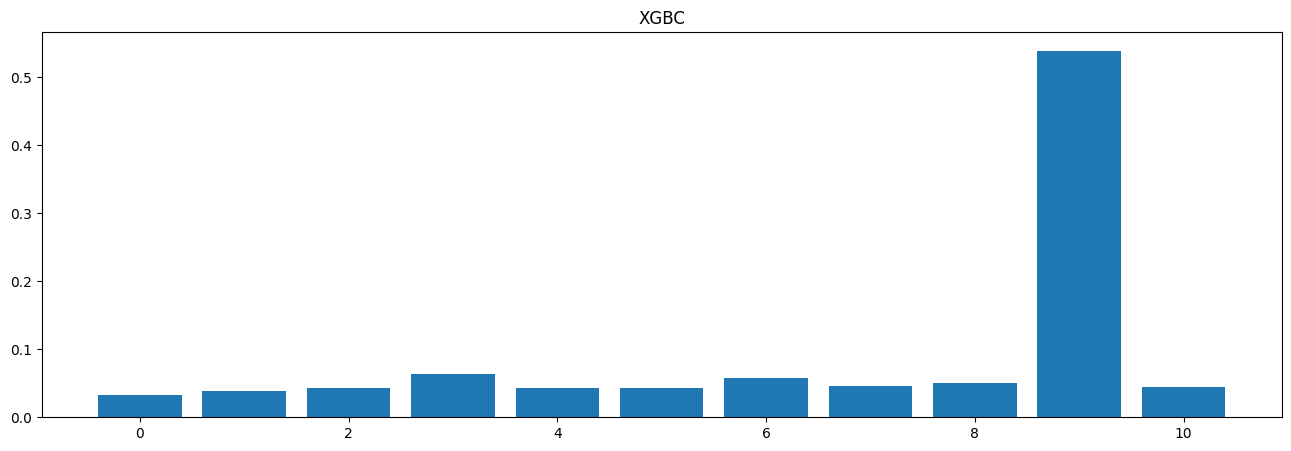


Feature importance by Random Forest:->

Gender -> 0.017516374005524516
Married -> 0.02499249826923888
Dependents -> 0.05006831410735039
Education -> 0.02235372502761123
Self_Employed -> 0.01777773171240901
ApplicantIncome -> 0.2062647490828848
CoapplicantIncome -> 0.11936473567166135
LoanAmount -> 0.19149967168114196
Loan_Amount_Term -> 0.04141050431050145
Credit_History -> 0.2598732185718
Property_Area -> 0.04887847755987655


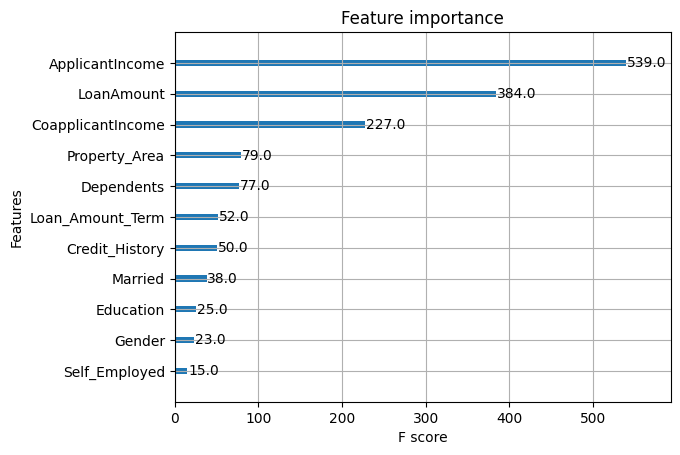

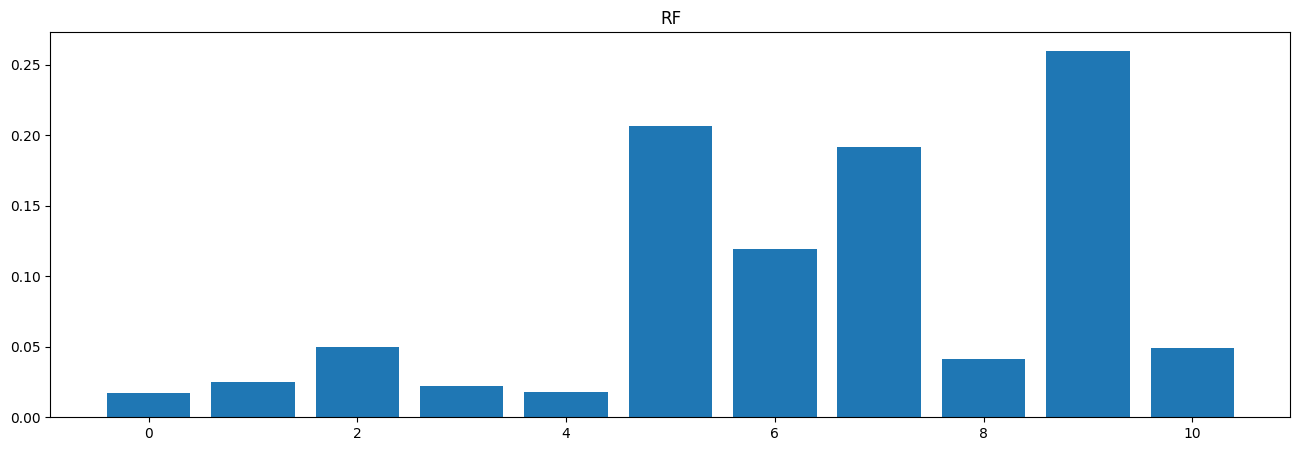

Feature importance by Decision Tree:->

Gender -> 0.018103003773916097
Married -> 0.00938008732131147
Dependents -> 0.06774245750174664
Education -> 0.020592364905141575
Self_Employed -> 0.011818073892274126
ApplicantIncome -> 0.2348245776537006
CoapplicantIncome -> 0.0884921066723446
LoanAmount -> 0.18454327625373962
Loan_Amount_Term -> 0.03259464507512319
Credit_History -> 0.2922008668920113
Property_Area -> 0.039708540058690844


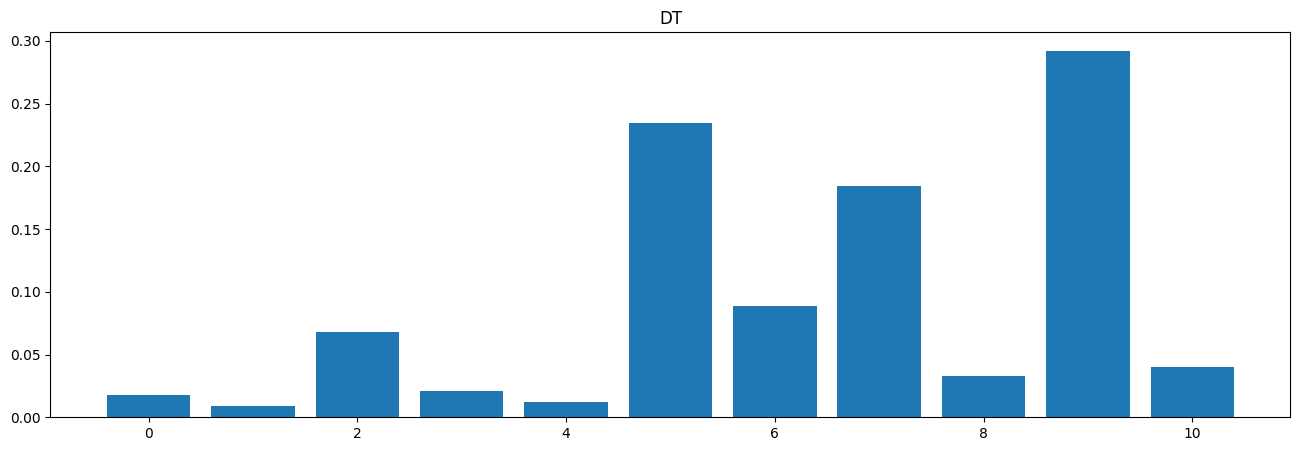

Feature importance by Suppoprt Vector Machine:->

Gender -> -0.011153748611395287
Married -> 0.016433621802949716
Dependents -> -0.0003948864299205823
Education -> -0.007897250281862611
Self_Employed -> -0.0045186612877454735
ApplicantIncome -> 0.009509713938893327
CoapplicantIncome -> 0.0009391121595605512
LoanAmount -> -0.012713675348784648
Loan_Amount_Term -> 8.910680668350324e-05
Credit_History -> 2.0812104159306477
Property_Area -> -0.0006557085562250223


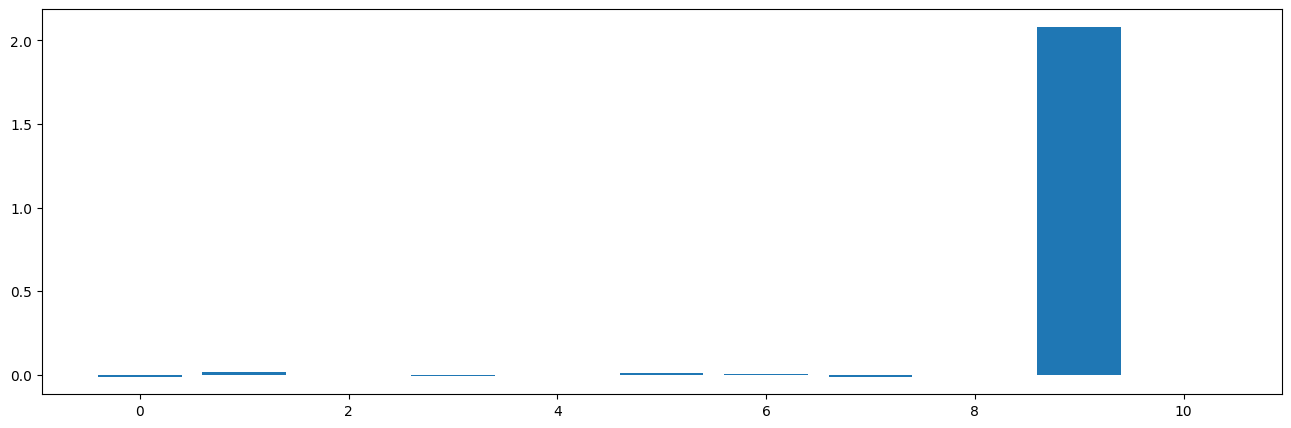

Feature importance by Logistic Regression:->

Gender -> -0.16049205754499127
Married -> 0.4318044368656096
Dependents -> 0.05622383360085621
Education -> -0.4139565798999101
Self_Employed -> 0.04271984818162127
ApplicantIncome -> 0.10257613074067891
CoapplicantIncome -> 0.04607333558301258
LoanAmount -> -0.5499441933640734
Loan_Amount_Term -> -0.0012411324727406067
Credit_History -> 3.270667707191756
Property_Area -> 0.05634297740683534


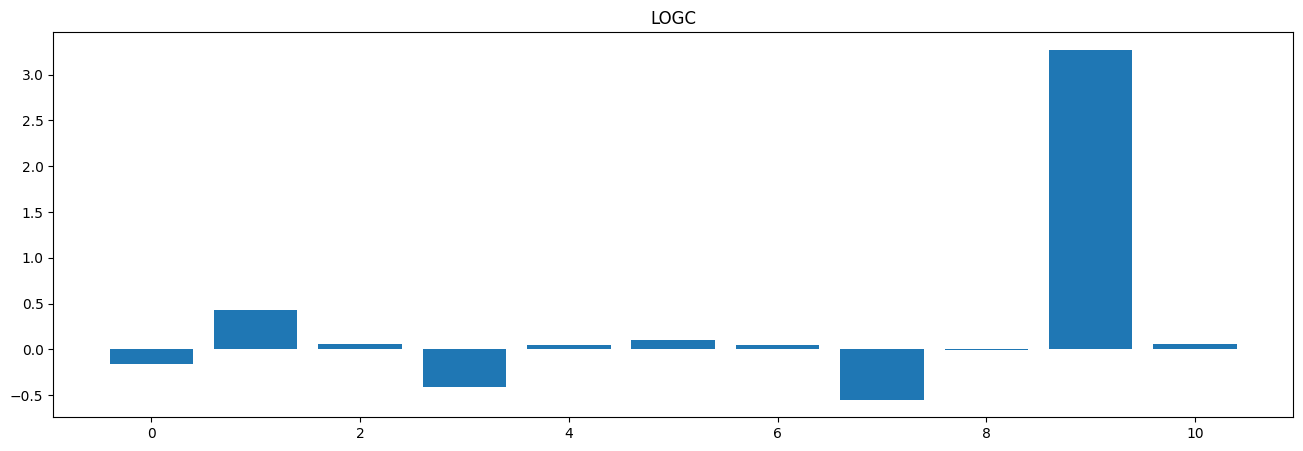

In [ ]:
print("Feature importance by XGBoost:->\n")
XGBR = XGBClassifier()
XGBR.fit(X,y)
features = XGBR.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="XGBC")
plt.bar([x for x in range(len(features))],features)
plt.show()

plot_importance(XGBR)

print("Feature importance by Random Forest:->\n")
RF = RandomForestClassifier()
RF.fit(X,y)
features = RF.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="RF")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Decision Tree:->\n")
DT = DecisionTreeClassifier()
DT.fit(X,y)
features = DT.feature_importances_
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="DT")
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Suppoprt Vector Machine:->\n")
SVM = SVC(kernel="linear")
SVM.fit(X,y)
features = SVM.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.bar([x for x in range(len(features))],features)
plt.show()

print("Feature importance by Logistic Regression:->\n")
LOGC = LogisticRegression()
LOGC.fit(X,y)
features = LOGC.coef_[0]
Columns = list(X.columns)
for i,j in enumerate(features):
    print(Columns[i],"->",j)
plt.figure(figsize=(16,5))
plt.title(label="LOGC")
plt.bar([x for x in range(len(features))],features)
plt.show()

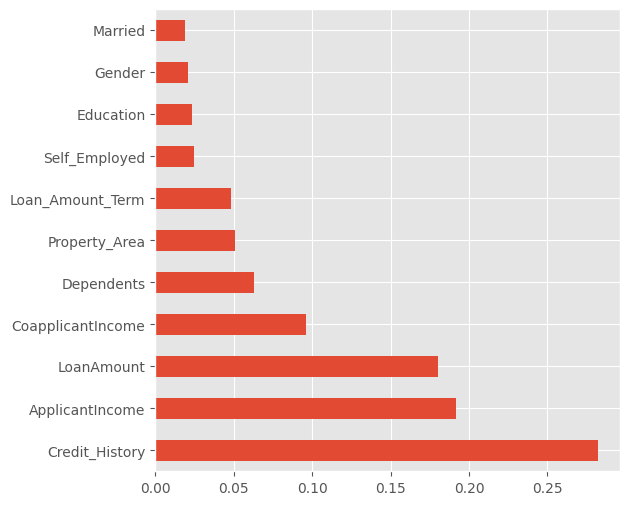

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
plt.style.use('ggplot')
plt.figure(figsize=(6,6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(50).plot(kind='barh')
plt.show()

From feature importance -> Credit History , ApplicantIncome , CoapplicantIncome, LoanAmount are the most important features

<Axes: >

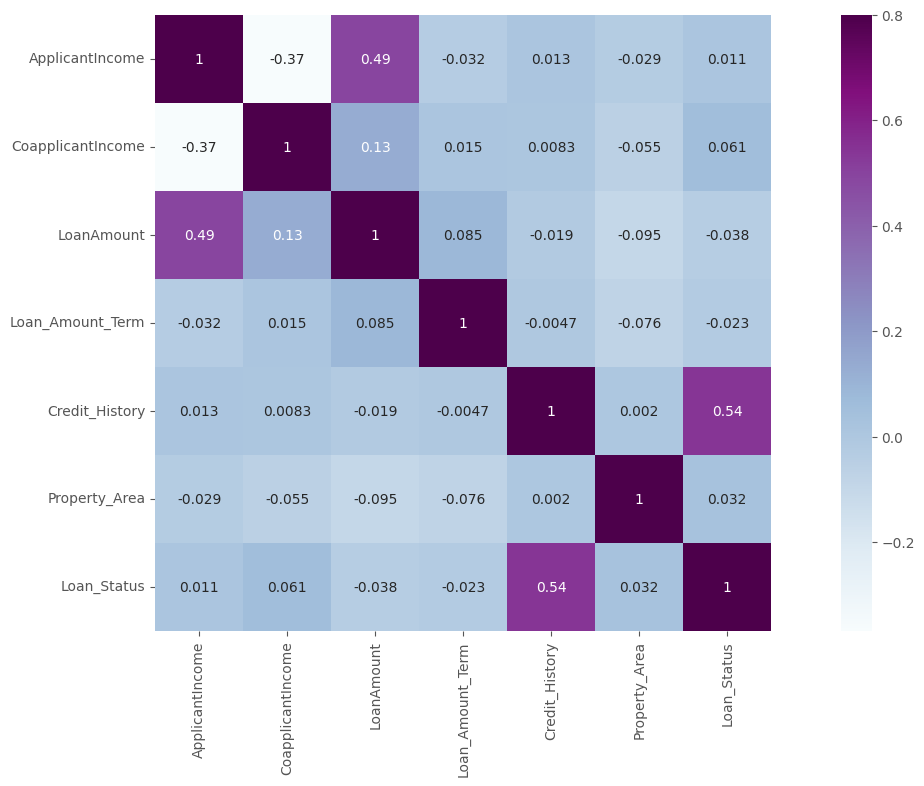

In [ ]:
#Heat map of dataset with relative importance
matrix = data.drop(["Gender","Married","Dependents","Education","Self_Employed"],axis=1).corr()
#f , ax = plt.subplots(figsize=(18,6))
plt.figure(figsize=(18,8))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu",annot=True)

It seems Credit history and Loan Status are correlated.

Application income and Loan Amount are correlated.

Coapplicant income and Loan amount are correlatedn.

In [ ]:
A = list(data.Loan_Status).count(1)
B = list(data.Loan_Status).count(0)
print("Count of 1<Approved>: ",A,"\nCount of 0<Rejected>: ",B)

fig = px.bar((A,B),x=["Approved","Rejected"],y=[A,B],color=[A,B],width=500, height=400)
fig.show()

Count of 1<Approved>:  422 
Count of 0<Rejected>:  192


It seems that data is highly Imbalanced.

When the target classes does not have equal count then the data is considered as imbalanced data.

From above graph it seems that dataset contains more records with Approved Loan_Status than Rejected Loan_Status. 422 over 192

(If data would have maximum of 20-30 records difference that time this imabalnced would be ignorable.)

This will lead to make wrong assumptions by model and also model will be biased after training. 

To overcome this problem we will balance the data using Resampling technique with Upsample and Downsample.

In [ ]:
#To keep original data as it is to use the same for later.
new_data = data.copy()

#Getting seperated data with 1 and 0 status.
df_majority = new_data[new_data.Loan_Status==1]
df_minority = new_data[new_data.Loan_Status==0]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_majority_downsampled = resample(df_majority,replace=False,n_samples=192,random_state=123)
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=422,random_state=123)
df_upsampled = pd.concat([df_majority,df_minority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 1    192
0    192
Name: Loan_Status, dtype: int64
Upsampled data:->
 1    422
0    422
Name: Loan_Status, dtype: int64


Data Standardization / Normalization Data normalization is required when the variable values are in very distinct range.

For Ex. Suppose we have 2 columns "Age" and "Income"

Where value range of "Age" lying in 0-100 Approx. and value range of "Income" lying in 20,000 to 100,000

At this time model will perform poorly on testig data as all input values are not in same value range.

So not every time but whenever we get such type of data we need to normalized it i.e. Rescale it.

Widely used scaling tools are Min-Max Scaler and Standard-Scaler

Data Normalization is done by Min-Max Scaler which scales all th values between 0 to 1 range.

Data standardization is done by Standard-Scaler which scales the data so that Mean of observed data is 0 and Standard Deviation is 1.

As our data is not much normally distributed we will choose Standardization using Standard-Scaler aiming that it will reduce more skewness and contribute in accuracy gain.

Experimental Modeling In order to gain maximum posible accuracy one needs to conduct much more experiments.

We will pass data on by one with different state i.e.

-Only Scaled data

-Scaled + Down Sampled Data

-Scaled + Up Sampled Data

-Scaled + Up Sampled Data + Selected feature with respective importance.

In [ ]:
#Experiment 1: Only Scaled data with all variables

#X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data["Loan_Status"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test),"\n")


KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

Counter:  Counter({1: 422, 0: 192})
After Standardization
Mean  -1.2357264969740873e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.49      0.78      0.60        27
           1       0.95      0.83      0.88       127

    accuracy                           0.82       154
   macro avg       0.72      0.80      0.74       154
weighted avg       0.87      0.82      0.83       154

Voting Ensemble:> 0.8181818181818182
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312
              precision    recall  f1-score   support

           0       0.26      0.37      0.30        30
           1       0.83      0.74      0.78       124

    ac

In [ ]:
#Experiment 2: Sclaed + Down Sampled Data

#X = df_downsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_downsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_downsampled.Loan_Status
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False,)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

After Standardization
Mean  -3.064327691705293e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.58      0.72      0.64        39
           1       0.77      0.65      0.70        57

    accuracy                           0.68        96
   macro avg       0.68      0.68      0.67        96
weighted avg       0.69      0.68      0.68        96

Voting Ensemble:> 0.6770833333333334
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        20
           1       1.00      0.63      0.77        76

    accuracy                           0.71        96
   macro avg       0.71      0.82      0.68        96
weighted avg       0.88      0.71      0.74        96

SVM:> 0.7083333333333334
              precision    recall  f1-score   support

           0       0.48      0.62      0.54        37
           1       0.71      0.58      0.64        59

    accuracy                           0.59

In [ ]:
#Experiment 3: Sclaed + Up Sampled Data

#X = df_upsampled.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status",'Property_Area'],axis=1)
X = df_upsampled.drop(["Loan_Status","Loan_ID"],axis=1)
y = df_upsampled.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

844 844
After Standardization
Mean  7.143184188310644e-17 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        87
           1       0.87      0.73      0.79       124

    accuracy                           0.78       211
   macro avg       0.78      0.79      0.78       211
weighted avg       0.80      0.78      0.78       211

Voting Ensemble:> 0.7772511848341233
              precision    recall  f1-score   support

           0       0.38      0.95      0.54        43
           1       0.98      0.60      0.75       168

    accuracy                           0.67       211
   macro avg       0.68      0.78      0.64       211
weighted avg       0.86      0.67      0.70       211

SVM:> 0.6729857819905213
              precision    recall  f1-score   support

           0       0.67      0.73      0.70        98
           1       0.75      0.68      0.71       113

    accuracy                        

In [ ]:
# Experiment 4: Sclaed + Selected features with respective importance
#Droping features which are less important and keeping features as per importance analysis.
X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
#X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")

#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("XGB",XGBClassifier()))
models.append(("RF",RandomForestClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))

ensemble = VotingClassifier(estimators=models)
ensemble.fit(X_train,y_train)
y_pred = ensemble.predict(X_test) 
print(classification_report(y_pred,y_test))
print("Voting Ensemble:>",accuracy_score(y_pred,y_test))



SVM = SVC(kernel="linear",class_weight="balanced",probability=True)
SVM.fit(X_train,y_train)
y_pred = SVM.predict(X_test)
print(classification_report(y_pred,y_test))
print("SVM:>",accuracy_score(y_pred,y_test))


XGBC = XGBClassifier(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
 reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27,eval_metric = "logloss")
XGBC.fit(X_train,y_train)
y_pred = XGBC.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))

Model1 = RandomForestClassifier(n_estimators=1000,random_state=0,n_jobs=1000,max_depth=70,bootstrap=True)
Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
print(classification_report(y_pred,y_test))
print("RandomForestClassifier:>",accuracy_score(y_pred,y_test))


Model2 = GradientBoostingClassifier()
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))


Model3 = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=100,
 max_features=1.0, max_leaf_nodes=10, min_samples_leaf=1,
 min_samples_split=2, min_weight_fraction_leaf=0.10,
 random_state=27, splitter='best')
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("DecisionTreeClassifier:>",accuracy_score(y_pred,y_test))


Model4 = AdaBoostClassifier()
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))


Model5 = LinearDiscriminantAnalysis()
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
print(classification_report(y_pred,y_test))
print("LinearDiscriminantAnalysis:>",accuracy_score(y_pred,y_test))

KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=20)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_pred,y_test))
print("KNeighborsClassifier:>",accuracy_score(y_pred,y_test))


Model7 = GaussianNB()
Model7.fit(X_train,y_train)
y_pred = Model7.predict(X_test)
print(classification_report(y_pred,y_test))
print("GaussianNB:>",accuracy_score(y_pred,y_test))


Model8 = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Model8.fit(X_train,y_train)
y_pred = Model8.predict(X_test)
print(classification_report(y_pred,y_test))
print("Logistic Regression:>",accuracy_score(y_pred,y_test))

614 614
After Standardization
Mean  -3.2669519263752433e-16 Standard Deviation  1.0 

              precision    recall  f1-score   support

           0       0.51      0.73      0.60        30
           1       0.93      0.83      0.88       124

    accuracy                           0.81       154
   macro avg       0.72      0.78      0.74       154
weighted avg       0.85      0.81      0.82       154

Voting Ensemble:> 0.8116883116883117
              precision    recall  f1-score   support

           0       0.44      0.90      0.59        21
           1       0.98      0.82      0.89       133

    accuracy                           0.83       154
   macro avg       0.71      0.86      0.74       154
weighted avg       0.91      0.83      0.85       154

SVM:> 0.8311688311688312
              precision    recall  f1-score   support

           0       0.23      0.34      0.28        29
           1       0.83      0.74      0.78       125

    accuracy                      

In [ ]:
# Tuning SVM parameters

#X = new_data.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Loan_Amount_Term","Loan_Status","Property_Area"],axis=1)
X = new_data.drop(["Loan_Status","Loan_ID"],axis=1)
y = new_data.Loan_Status
print(len(X),len(y))
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)


model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

614 614
Best: 0.689468 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.689468 (0.016542) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.686215 (0.027277) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.682434 (0.009840) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.026685) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.687308 (0.005314) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.687308 (0.005314) with: {'C': 0.01, 'gamma': '

**Conclusion** 
Resut Summary is as below:-----> Algorithm : Accuracy

Experiment 1 : Scaled data only

Support Vector Machine 83.116 Decision Tree 83.1168 Linear Discriminant Analysis 83.166 KNearest Neighbors 83.766 Gaussian Naivey Bayes 83.116 Logistic Regression 83.116

Experiment 2: Sclaed + Down Sampled Data

AdaBoost 73.95 Decision Tree 72.91 Adaboost 73.9

Experiment 3: Sclaed + Up Sampled Data

Random Forest only 83.88

Experiment 4: Sclaed + Selected features with respective importance

Support Vector Machine 83.11 Decision Tree 83.11 AdaBoost 82.46 Linear Discriminant Analysis 83.11 KNearest Neighbors 83.11 Gaussian Naivey Bayes 83.11 Logistic Regression 83.11

Also after parameter tuning with

KNN 83.11

After all possible experiments Maximum accuracy achieved By making data balanced as Up Sampling. Surprisingly only Random forest performed well in that state of the data.

Surprisingly feature selection doesn't make increase in accuracy.

# Understanding the various features (columns) of the dataset.

In [ ]:
# Store total number of observation in training dataset
df_length =len(df)

# Store total number of columns in testing data set
test_col = len(test.columns)

In [ ]:
# Summary of numerical variables for training data set

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not.

<Axes: xlabel='Dependents', ylabel='count'>

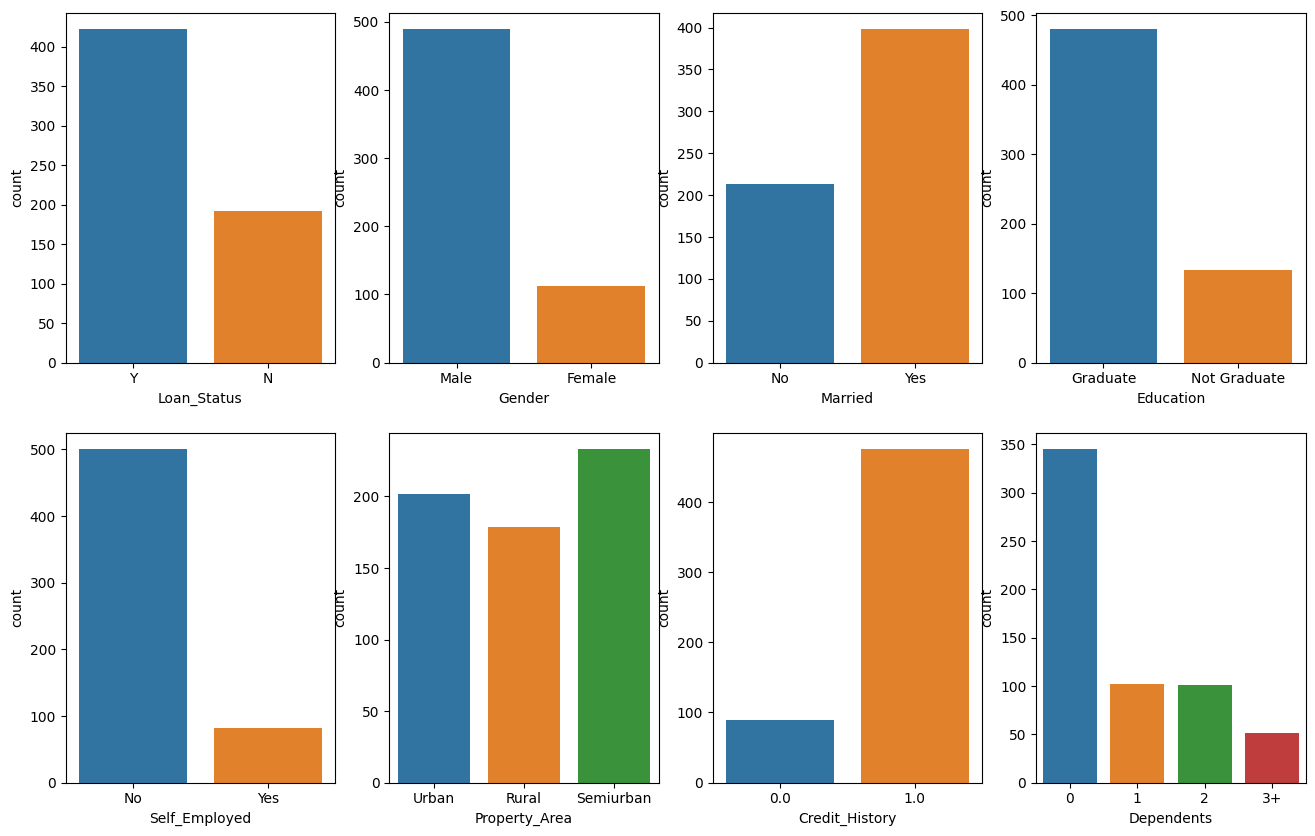

In [ ]:
#Univariate Analysis, countplots for categorical variables

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting charts
import seaborn as sns # Plotting charts
import os # To change directories on local machine
from sklearn.model_selection import train_test_split # train and test split for Modelling 

fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(data=df, x='Loan_Status',ax=ax[0][0])
sns.countplot(data=df, x='Gender',ax=ax[0][1])
sns.countplot(data=df, x='Married',ax=ax[0][2])
sns.countplot(data=df, x='Education',ax=ax[0][3])
sns.countplot(data=df, x='Self_Employed',ax=ax[1][0])
sns.countplot(data=df, x='Property_Area',ax=ax[1][1])
sns.countplot(data=df, x='Credit_History',ax=ax[1][2])
sns.countplot(data=df, x='Dependents',ax=ax[1][3])

# df['Property_Area'].value_counts()
# df['Property_Area'].value_counts().plot(kind='bar')

In [ ]:
#Catplot - 'Married' Vs 'Loan_Status' 
sns.catplot(data=data,x='Married',y='Loan_Status',kind='point')

NameError: ignored

In [ ]:
print(data["Gender"].value_counts())
print(data["Married"].value_counts())
print(data["Self_Employed"].value_counts())
print(data["Dependents"].value_counts())
print(data["Credit_History"].value_counts())
print(data["Loan_Amount_Term"].value_counts())

**Univariate analysis Observations:**

- More Loans are approved than Rejected
- Count of Male applicants is more than Female
- Count of Married applicant is more than Non-married
- Count of graduate are more than non-Graduate
- Count of self-employed is less than that of Non-Self-employed
- Maximum properties are located in Semiurban areas
- Credit History is present for many applicants
- Count of applicants with number of dependents=0 is maximum.

2. Understanding Distribution of Numerical Variables
    - ApplicantIncome
    - LoanAmount

<Axes: >

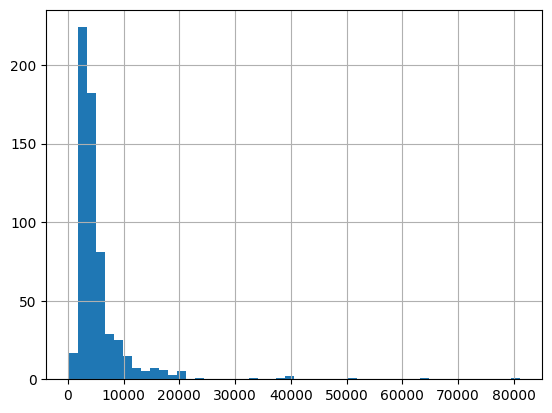

In [ ]:
# Box Plot for understanding the distributions and to observe the outliers.

%matplotlib inline

# Histogram of variable ApplicantIncome

df['ApplicantIncome'].hist(bins=50)  #can remove grid (bins=50,grid=False)

<Axes: >

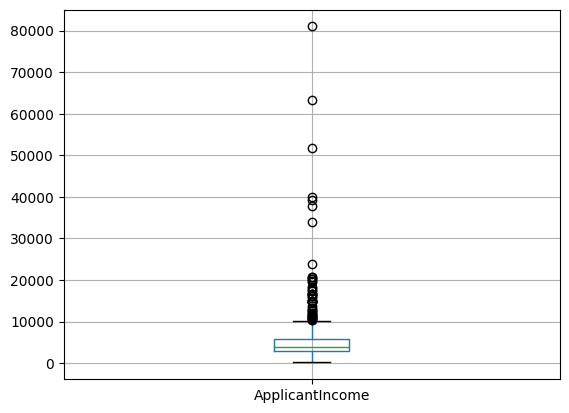

In [ ]:
# Box Plot for variable ApplicantIncome of training data set

df.boxplot(column='ApplicantIncome')

3. The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. 

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

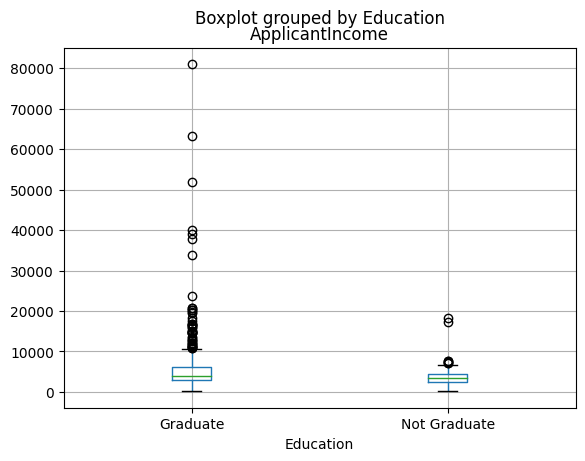

In [ ]:
# Box Plot for variable ApplicantIncome by variable Education of training data set

df.boxplot(column='ApplicantIncome', by = 'Education')

4. We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

<Axes: >

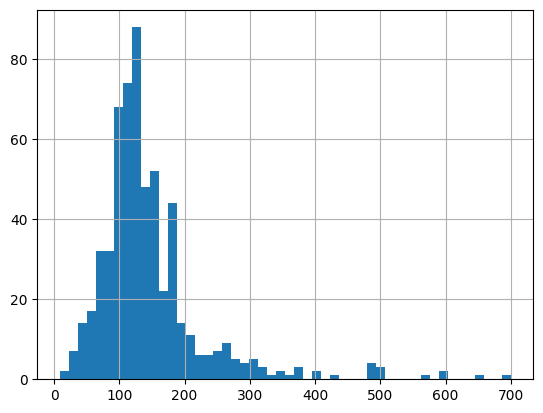

In [ ]:
# Histogram of variable LoanAmount

df['LoanAmount'].hist(bins=50)

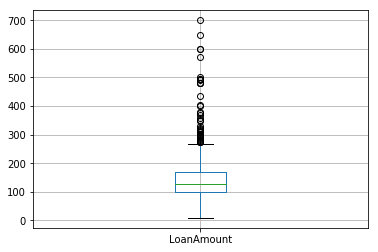

In [ ]:
# Box Plot for variable LoanAmount of training data set

df.boxplot(column='LoanAmount')

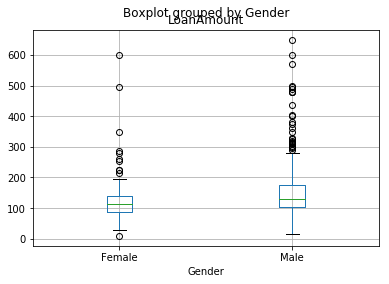

In [ ]:
# Box Plot for variable LoanAmount by variable Gender of training data set

df.boxplot(column='LoanAmount', by = 'Gender')

5. LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values.

# Understanding Distribution of Categorical Variables

In [ ]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()
print(loan_approval)

Y    422
N    192
Name: Loan_Status, dtype: int64


- 422 number of loans were approved.

In [ ]:
# Credit History and Loan Status
pd.crosstab(df ['Credit_History'], df ['Loan_Status'], margins=True, normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789
All,0.317376,0.682624


In [ ]:
# Credit History and Loan Status
df.sort_values('Credit_History')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
450,LP002446,Male,Yes,2,Not Graduate,No,2309,1255.0,125.0,360.0,0.0,Rural,N
452,LP002448,Male,Yes,0,Graduate,No,3948,1733.0,149.0,360.0,0.0,Rural,N
453,LP002449,Male,Yes,0,Graduate,No,2483,2466.0,90.0,180.0,0.0,Rural,Y
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,LP002757,Female,Yes,0,Not Graduate,No,3017,663.0,102.0,360.0,NaN,Semiurban,Y
556,LP002794,Female,No,0,Graduate,No,2667,1625.0,84.0,360.0,NaN,Urban,Y
565,LP002833,Male,Yes,0,Not Graduate,No,4467,0.0,120.0,360.0,NaN,Rural,Y
583,LP002898,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Function to output percentage row wise in a cross table
def percentageConvert(ser):
    return ser/float(ser[-1])

# # Loan approval rate for customers having Credit_History (1)
#df['Y'] = pd.crosstab(df ["Credit_History"], df ["Loan_Status"], margins=True).apply(percentageConvert, axis=1)
#loan_approval_with_Credit_1 = df['Y'][1]
#print(loan_approval_with_Credit_1*100)

- 79.58 % of the applicants whose loans were approved have Credit_History equals to 1.

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Replace missing value of Self_Employed with more frequent category
df['Self_Employed'].fillna('No',inplace=True)

# Outliers of LoanAmount and Applicant Income

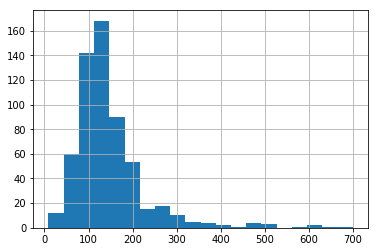

In [ ]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Looking at the distribtion of TotalIncome
df['LoanAmount'].hist(bins=20)

- The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

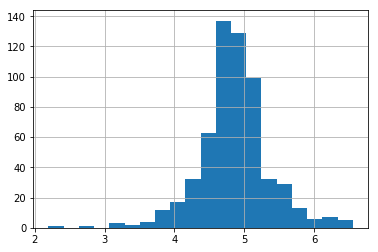

In [ ]:
# Perform log transformation of TotalIncome to make it closer to normal
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Looking at the distribtion of TotalIncome_log
df['LoanAmount_log'].hist(bins=20)

# Data Preparation for Model Building

- sklearn requires all inputs to be numeric, we should convert all our categorical variables into numeric by encoding the categories. Before that we will fill all the missing values in the dataset.

In [ ]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

# Convert all non-numeric values to number
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

for var in cat:
    le = preprocessing.LabelEncoder()
    df[var]=le.fit_transform(df[var].astype('str'))
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

# Generic Classification Function

In [ ]:
#Import models from scikit learn module:
from sklearn import metrics
from sklearn.cross_validation import KFold

#Generic function for making a classification model and accessing performance:

def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

/Users/Technocrat/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Model Building

In [ ]:
#Combining both train and test dataset

#Create a flag for Train and Test Data set
df['Type']='Train' 
test['Type']='Test'
fullData = pd.concat([df,test], axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        29
Dependents            10
Education              0
Gender                11
LoanAmount            27
LoanAmount_log       389
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed         23
TotalIncome          367
Type                   0
dtype: int64

In [ ]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

In [ ]:
#Imputing Missing values with mean for continuous variable
fullData['LoanAmount'].fillna(fullData['LoanAmount'].mean(), inplace=True)
fullData['LoanAmount_log'].fillna(fullData['LoanAmount_log'].mean(), inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mean(), inplace=True)
fullData['ApplicantIncome'].fillna(fullData['ApplicantIncome'].mean(), inplace=True)
fullData['CoapplicantIncome'].fillna(fullData['CoapplicantIncome'].mean(), inplace=True)

#Imputing Missing values with mode for categorical variables
fullData['Gender'].fillna(fullData['Gender'].mode()[0], inplace=True)
fullData['Married'].fillna(fullData['Married'].mode()[0], inplace=True)
fullData['Dependents'].fillna(fullData['Dependents'].mode()[0], inplace=True)
fullData['Loan_Amount_Term'].fillna(fullData['Loan_Amount_Term'].mode()[0], inplace=True)
fullData['Credit_History'].fillna(fullData['Credit_History'].mode()[0], inplace=True)

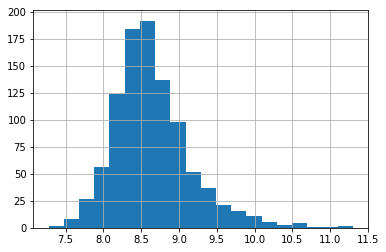

In [ ]:
#Create a new column as Total Income

fullData['TotalIncome']=fullData['ApplicantIncome'] + fullData['CoapplicantIncome']

fullData['TotalIncome_log'] = np.log(fullData['TotalIncome'])

#Histogram for Total Income
fullData['TotalIncome_log'].hist(bins=20) 

In [ ]:
#create label encoders for categorical features
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype('str'))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype('str'))

/Users/Technocrat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Logistic Regression Model

1. The chances of getting a loan will be higher for:

    - Applicants having a credit history (we observed this in exploration.)
    - Applicants with higher applicant and co-applicant incomes
    - Applicants with higher education level
    - Properties in urban areas with high growth perspectives

So let’s make our model with ‘Credit_History’, 'Education' & 'Gender'

In [ ]:
from sklearn.linear_model import LogisticRegression


predictors_Logistic=['Credit_History','Education','Gender']

x_train = train_modified[list(predictors_Logistic)].values
y_train = train_modified["Loan_Status"].values

x_test=test_modified[list(predictors_Logistic)].values

In [ ]:
# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets
model.fit(x_train, y_train)

#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

outcome_var = 'Loan_Status'

classification_model(model, df,predictors_Logistic,outcome_var)

test_modified.to_csv("Logistic_Prediction.csv",columns=['Loan_ID','Loan_Status'])

Accuracy : 80.945%
Cross-Validation Score : 80.946%


/Users/Technocrat/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/Technocrat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
